In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(9,6)
import seaborn as sns

In [432]:
df  = pd.read_excel(r"C:\Users\255046\Downloads\Inflow referral from 2017 Jan to 2023 September 14th.xlsx")

In [433]:
boi = df[['Review_Type','Min_of_Time_arrived','Risk']]

In [434]:
low = boi[boi['Risk'] == 'Low risk']

In [435]:
holi_list = ['2017-01-01','2017-03-14','2017-03-17','2017-04-02','2017-04-05',
            '2017-05-03','2017-06-07','2017-06-20','2017-08-02','2017-10-25',
            '2017-12-25','2017-12-26','2017-12-29',
            '2018-01-01','2018-03-14','2018-03-17','2018-04-02','2018-04-05',
            '2018-05-03','2018-06-07','2018-06-20','2018-08-02','2018-10-25',
            '2018-12-25','2018-12-26','2018-12-29',
            '2019-01-01','2019-03-14','2019-03-17','2019-04-02','2019-04-05',
            '2019-05-03','2019-06-07','2019-06-20','2019-08-02','2019-10-25',
            '2019-12-25','2019-12-26','2019-12-29',
            '2020-01-01','2020-03-14','2020-03-17','2020-04-02','2020-04-05',
            '2020-05-03','2020-06-07','2020-06-20','2020-08-02','2020-10-25',
            '2020-12-25','2020-12-26','2020-12-29',
            '2021-01-01','2021-03-14','2021-03-17','2021-04-02','2021-04-05',
            '2021-05-03','2021-06-07','2021-06-20','2021-08-02','2021-10-25',
            '2021-12-25','2021-12-26','2021-12-29','2022-01-01','2022-01-03','2022-03-17','2022-03-18','2022-03-27','2022-04-15','2022-04-18',
            '2022-05-02','2022-06-06','2022-06-19','2022-08-01','2022-10-31','2022-12-25',
            '2022-12-26','2022-12-27','2022-12-28',
             '2023-01-02','2023-02-06','2023-03-17','2023-04-07','2023-04-10',
            '2023-05-01']

date_list = pd.to_datetime(holi_list)

In [445]:
low.head()

,Review_Type,Min_of_Time_arrived,Risk
0,Corporate on boarding,2017-01-03 08:25:57,Low risk
1,SME on boarding,2017-01-03 09:28:37,Low risk
2,SME on boarding,2017-01-03 09:40:08,Low risk
3,SME on boarding,2017-01-03 09:48:36,Low risk
4,Asset Finance,2017-01-03 09:53:57,Low risk


In [436]:
Corporate = low[low['Review_Type'] == 'Corporate on boarding']
cop = Corporate[['Min_of_Time_arrived','Review_Type']]
cop['Min_of_Time_arrived']=cop['Min_of_Time_arrived'].dt.date
cop['Min_of_Time_arrived']=pd.to_datetime(cop['Min_of_Time_arrived'])
cop = pd.DataFrame(cop.groupby('Min_of_Time_arrived')['Review_Type'].count()).reset_index()
cop = cop[cop['Min_of_Time_arrived'].dt.dayofweek < 5]
cop = cop[~cop['Min_of_Time_arrived'].dt.normalize().isin(date_list)]
cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 0 to 1641
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Min_of_Time_arrived  1575 non-null   datetime64[ns]
 1   Review_Type          1575 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 36.9 KB


C:\Users\255046\AppData\Local\Temp\ipykernel_8688\805893524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop['Min_of_Time_arrived']=cop['Min_of_Time_arrived'].dt.date
C:\Users\255046\AppData\Local\Temp\ipykernel_8688\805893524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop['Min_of_Time_arrived']=pd.to_datetime(cop['Min_of_Time_arrived'])


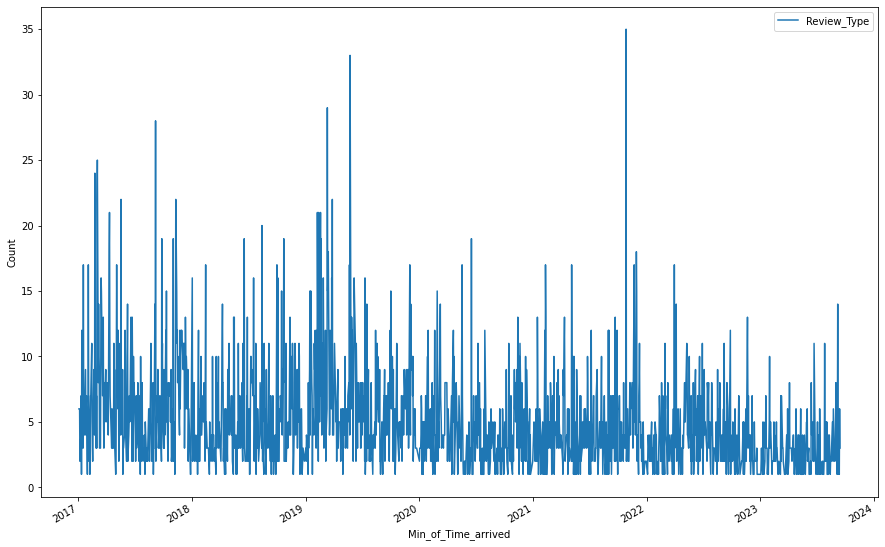

In [437]:
cop = cop.set_index('Min_of_Time_arrived')
cop.plot(figsize=(15,10))
plt.xlabel('Min_of_Time_arrived')
plt.ylabel('Count')
plt.show()

In [282]:
import numpy as np
cop['Review_Type']=np.log(cop['Review_Type'])

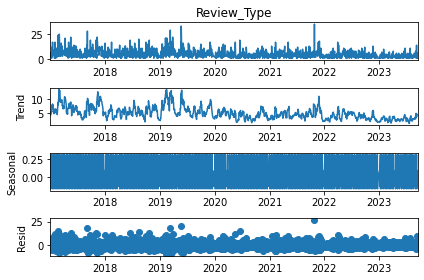

In [438]:
from statsmodels.tsa.seasonal import seasonal_decompose
# temp = df2[['Refferal_Count']]
decom = seasonal_decompose(cop['Review_Type'], model='additive', period=7)
decom.plot()
plt.show()

In [440]:
print(len(cop)*0.8)
train_df = cop[0:1260]
test_df = cop[1260::]
print(len(cop))
print(len(train_df))
print(len(test_df))

1260.0
1575
1260
315


In [298]:
df2=cop.copy()

In [299]:
from statsmodels.tsa.stattools import adfuller
x = cop.Review_Type.values
result = adfuller(x)
p_value = result[1]
print('p-value: %f' %result[1])
print(f'Result: The series is {"not " if p_value<0.05 else ""}stationary')

p-value: 0.000000
Result: The series is not stationary


In [300]:
df2['shift1_volume']=df2['Review_Type'].shift(12)
#temp=df2.dropna()
x = temp['shift1_volume'].values
result = adfuller(x)
p_value = result[1]
print('p-value: %f' %result[1])
print(f'Result: The series is {"not " if p_value<0.05 else ""}stationary')

p-value: 0.000000
Result: The series is not stationary


In [301]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

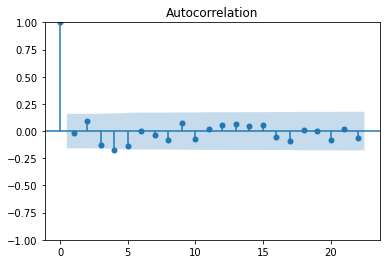

In [302]:
plot_acf(df2['Review_Type'])
plt.show()

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


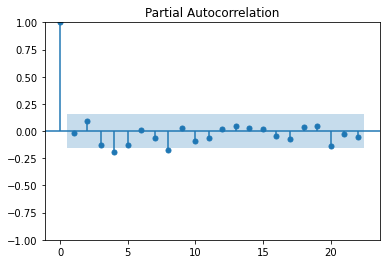

In [303]:
plot_pacf(df2['Review_Type'])
plt.show()

In [316]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train_df['Review_Type'],order=(2,2,3)).fit()

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\255046\AppData\Local\P

In [317]:
df_arima_forecast=pd.DataFrame()
df_arima_forecast['forecast'] =arima_model.predict(start=121, end=152)

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [318]:
df_arima_forecast.index=test_df.index
df_arima_forecast['actual'] = np.exp(test_df['Review_Type'])

In [321]:
arima_model_mape = mean_absolute_percentage_error (np.exp(df_arima_forecast['forecast']+1), df_arima_forecast['actual'])
arima_model_mape

0.5328371086020905

In [441]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm_notebook

In [48]:
def sarima(parameter_list, d,D,s,exog):
    result =[]
    for param in tqdm_notebook(parameter_list):
        try:
            model = SARIMAX(exog, order=(param[0],d,param[1]),
                          seasonal_order=(param[2],D,param[3],s)).fit()
        except:
            continue
        aic = model.aic
        result.append([param, aic])
    result_df = pd.DataFrame(result)
    result_df.columns = ['(p,q)x(P,Q)','AIC']
    result_df = result_df.sort_values(by = 'AIC', ascending = True).reset_index(drop = True)
    return result_df

In [50]:
p = range(0,4,1)
d = 1
q = range(0,4,1)
D = 1
P = range(0,4,1)
Q = range(0,4,1)
s = 8
parameters = product(p,q,P,Q)
parameter_list = list(parameters)
print(len(parameter_list))

256


In [51]:
result_df=sarima(parameter_list,1,1,4,cop["Review_Type"])

C:\Users\255046\AppData\Local\Temp\ipykernel_8688\1541314336.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameter_list):


  0%|          | 0/256 [00:00<?, ?it/s]

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\tools.py:274: RuntimeWarning: invalid value encountered in subtract
  differenced = (differenced[seasonal_periods:] -
C:\Users\255046\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_numdiff.py:489: RuntimeWarning: invalid val

In [52]:
result_df

,"(p,q)x(P,Q)",AIC
0,"(0, 0, 0, 0)",NaN
1,"(0, 0, 0, 1)",NaN
2,"(0, 0, 0, 2)",NaN
3,"(0, 0, 0, 3)",NaN
4,"(0, 1, 0, 0)",NaN
5,"(0, 1, 0, 1)",NaN
6,"(0, 1, 0, 2)",NaN
7,"(0, 1, 0, 3)",NaN
8,"(0, 2, 0, 0)",NaN
9,"(0, 2, 0, 1)",NaN


In [447]:
final_model=SARIMAX(train_df['Review_Type'],order=(2,1,3),seasonal_order=(0,1,1,12)).fit()

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [443]:
print(final_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Review_Type   No. Observations:                 1260
Model:             SARIMAX(5, 2, 0)x(5, 2, 0, 12)   Log Likelihood               -4105.294
Date:                            Thu, 26 Oct 2023   AIC                           8232.588
Time:                                    23:04:46   BIC                           8288.886
Sample:                                         0   HQIC                          8253.766
                                           - 1260                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4004      0.024    -58.305      0.000      -1.447      -1.353
ar.L2         -1.3453      0.041   

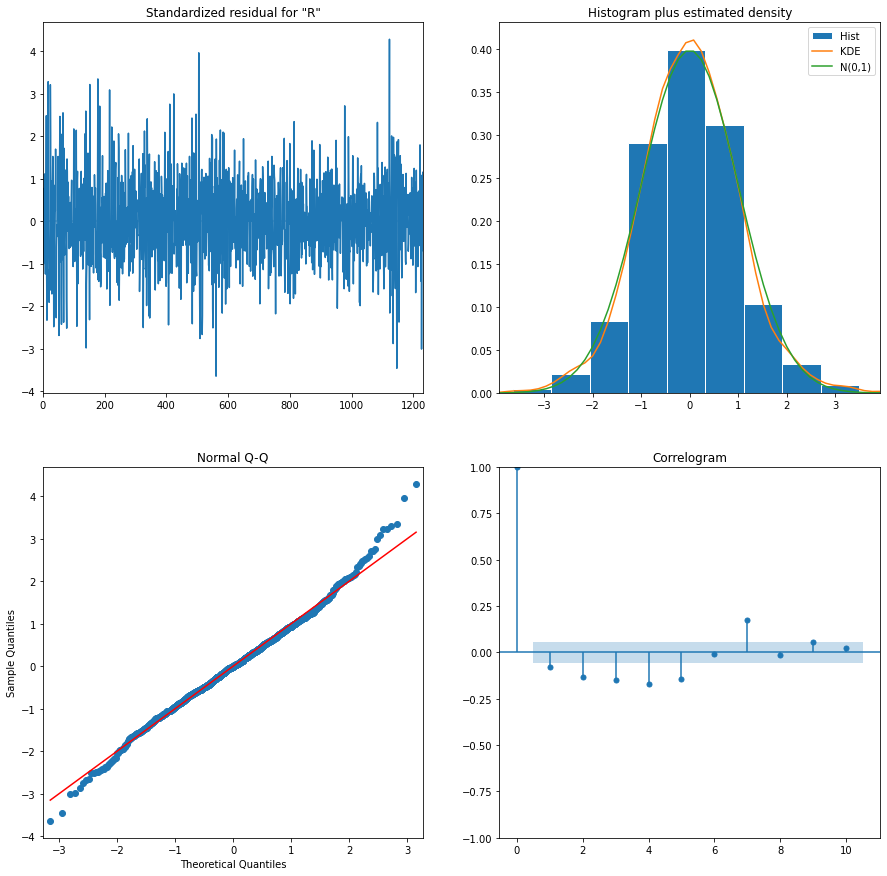

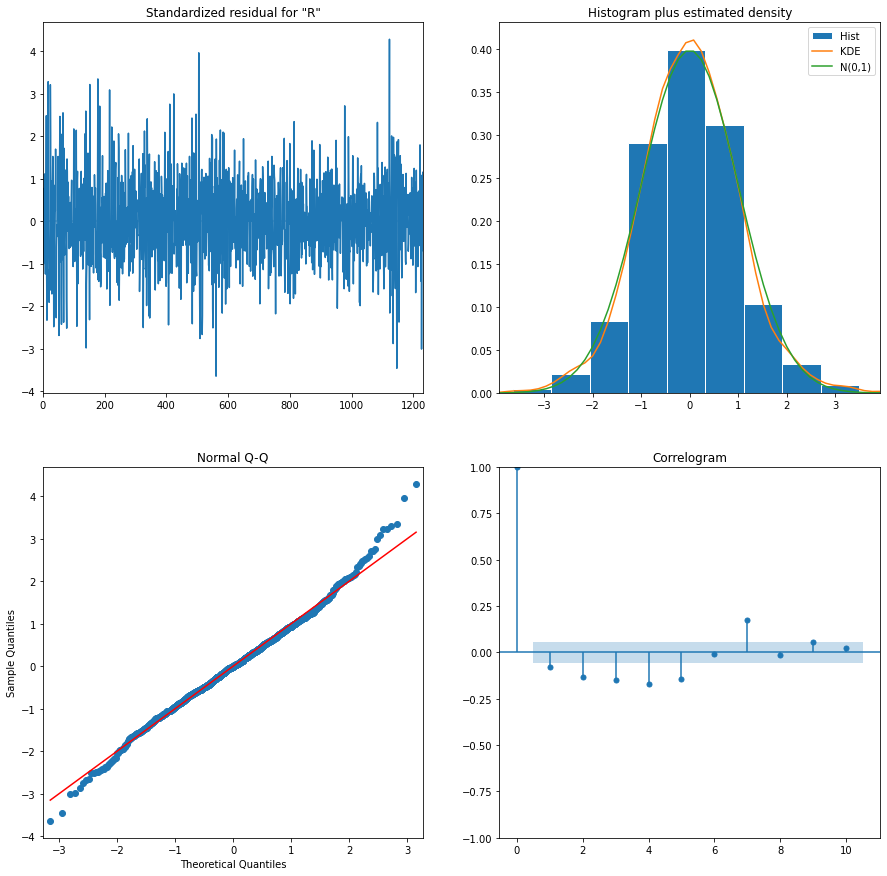

In [444]:
final_model.plot_diagnostics(figsize=(15,15))

473.3828660716958


C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Min_of_Time_arrived'>

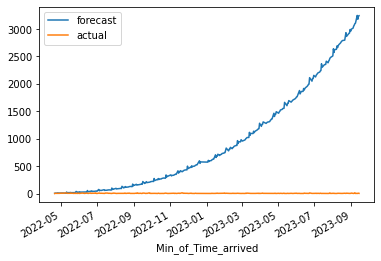

In [446]:
df_forecast=pd.DataFrame()
df_forecast['forecast'] =final_model.predict(start=1261,end=1575)
#df_forecast['forecast'] =sarimax_model.predict(start=1276, end=1595)+10

df_forecast.index=test_df.index
df_forecast['actual'] = test_df['Review_Type']
from sklearn.metrics import *
sarimax_model_mape = mean_absolute_percentage_error (df_forecast['actual'], df_forecast['forecast'])
print(sarimax_model_mape)
df_forecast.plot()

0.6118210384403515


C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

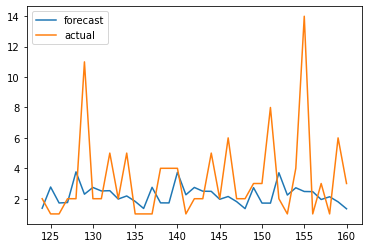

In [75]:
df_forecast=pd.DataFrame()
df_forecast['forecast'] =np.exp(final_model.predict(start=121,end=157))
#df_forecast['forecast'] =sarimax_model.predict(start=1276, end=1595)+10

df_forecast.index=test_df.index
df_forecast['actual'] = np.exp(test_df['Review_Type'])
from sklearn.metrics import *
sarimax_model_mape = mean_absolute_percentage_error (df_forecast['actual'], df_forecast['forecast'])
print(sarimax_model_mape)
df_forecast.plot()

In [ ]:
--------------------------fbprophet---------------------------

In [72]:
print(len(cop)*0.9)
train_df = cop[0:1418]
test_df = cop[1418::]
print(len(cop))
print(len(train_df))
print(len(test_df))

1417.5
1575
1418
157


In [96]:
print(len(cop)*0.8)
train_df = cop[0:992]
test_df = cop[992::]
print(len(cop))
print(len(train_df))
print(len(test_df))

991.2
1239
992
247


In [131]:
print(len(cop)*0.8)
train_df = cop[0:1078]
test_df = cop[1078::]
print(len(cop))
print(len(train_df))
print(len(test_df))

1077.6000000000001
1347
1078
269


In [15]:
from prophet.diagnostics import cross_validation

In [16]:
from prophet.diagnostics import performance_metrics
from tqdm import tqdm

In [17]:
from prophet import Prophet

In [ ]:
#  param_grid = {  
# 'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
# 'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
# 'seasonality_mode': ['multiplicative', 'additive'],
# 'growth': ['linear', 'logistic'],
# 'yearly_seasonality':[5,10,20,40],
# 'weekly_seasonality':[5,10,20,40],
# 'daily_seasonality':[5,10,20,40],
# }

In [18]:
prophet_model = Prophet(growth = 'linear',holidays_prior_scale=150, daily_seasonality=40,changepoint_range=0.9,changepoint_prior_scale=0.001,yearly_seasonality=40,seasonality_prior_scale=0.01, weekly_seasonality=20,seasonality_mode= 'multiplicative')
prophet_model.add_seasonality(name='weekly_off_season', period=5, fourier_order=5,prior_scale=80)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=12,prior_scale=30)
prophet_model.add_seasonality(name='yearly', period=365.25, fourier_order=24,prior_scale=60)
prophet_model.add_seasonality(name='daily',period=1,fourier_order=80,prior_scale=40)

In [183]:
# prophet_model = Prophet(growth = 'linear',holidays_prior_scale=150, daily_seasonality=True,changepoint_range=0.9,changepoint_prior_scale=0.1,yearly_seasonality=False,seasonality_prior_scale=10.0, weekly_seasonality=True,seasonality_mode= 'additive')
# prophet_model.add_seasonality(name='weekly_off_season', period=5, fourier_order=5,prior_scale=80)
# prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=12,prior_scale=30)
# prophet_model.add_seasonality(name='yearly', period=365.25, fourier_order=24,prior_scale=60)
# prophet_model.add_seasonality(name='daily',period=1,fourier_order=80,prior_scale=40)  ###---19.9%

In [124]:
# prophet_model = Prophet(growth = 'linear',holidays_prior_scale=100, daily_seasonality=True,changepoint_range=0.9,changepoint_prior_scale=0.1,yearly_seasonality=False,seasonality_prior_scale=10.0, weekly_seasonality=True,seasonality_mode= 'additive')
# prophet_model.add_seasonality(name='weekly_off_season', period=5, fourier_order=5,prior_scale=80)
# prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=9,prior_scale=30)
# prophet_model.add_seasonality(name='yearly', period=365.25, fourier_order=12,prior_scale=60)
# prophet_model.add_seasonality(name='daily',period=1,fourier_order=80,prior_scale=40)  ---20.3%

In [76]:
# prophet_model = Prophet(growth = 'linear',holidays_prior_scale=100, daily_seasonality=True,changepoint_range=0.9,changepoint_prior_scale=0.1,yearly_seasonality=False,seasonality_prior_scale=10.0, weekly_seasonality=True,seasonality_mode= 'additive')
# prophet_model.add_seasonality(name='weekly_off_season', period=5, fourier_order=4,prior_scale=80)
# prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=4,prior_scale=30)
# prophet_model.add_seasonality(name='yearly', period=365.25, fourier_order=12,prior_scale=60)
# prophet_model.add_seasonality(name='daily',period=1,fourier_order=80,prior_scale=40)  --20.5%

In [19]:
pro_train = train_df.copy()
pro_test = test_df.copy()

In [20]:
pro_train = pro_train.reset_index()
pro_test = pro_test.reset_index()

In [21]:
pro_train = pro_train.rename(columns={'Min_of_Time_arrived': 'ds', 'Review_Type': 'y'})
pro_test = pro_test.rename(columns={'Min_of_Time_arrived': 'ds', 'Review_Type': 'y'})

In [22]:
prophet_model.fit(pro_train)

17:52:02 - cmdstanpy - INFO - Chain [1] start processing
17:52:03 - cmdstanpy - INFO - Chain [1] done processing
17:52:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
17:52:03 - cmdstanpy - INFO - Chain [1] start processing
17:52:56 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future = pd.DataFrame()
future['ds'] = pro_test['ds']

In [24]:
from sklearn.metrics import *

In [25]:
prophet_forecast = prophet_model.predict(future)

In [28]:
mean_absolute_percentage_error(prophet_forecast['yhat'],pro_test['y'])

0.7090576956348584

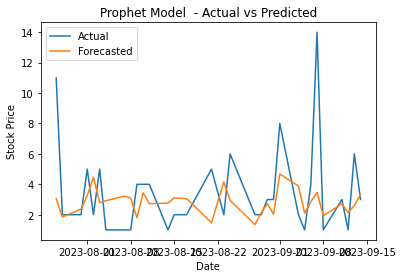

In [29]:
plt.plot(pro_test['ds'], pro_test['y'], label='Actual')
plt.plot(prophet_forecast['ds'],prophet_forecast['yhat'], label='Forecasted')
plt.title('Prophet Model  - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
### fbprophet ###

In [292]:
df  = pd.read_excel(r"C:\Users\255046\OneDrive - NTT DATA Group\Desktop\boi2023.xlsx")

In [293]:
boi = df[['Review_Type','Min_of_Time_arrived','Risk']]

In [294]:
low = boi[boi['Risk'] == 'Low risk']

In [295]:
Corporate = low[low['Review_Type'] == 'Corporate on boarding']
cop = Corporate[['Min_of_Time_arrived','Review_Type']]
cop['Min_of_Time_arrived']=cop['Min_of_Time_arrived'].dt.date
cop['Min_of_Time_arrived']=pd.to_datetime(cop['Min_of_Time_arrived'])
cop = pd.DataFrame(cop.groupby('Min_of_Time_arrived')['Review_Type'].count()).reset_index()
cop = cop[cop['Min_of_Time_arrived'].dt.dayofweek < 5]
#cop = cop[~cop['Min_of_Time_arrived'].dt.normalize().isin(date_list)]
cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 155
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Min_of_Time_arrived  152 non-null    datetime64[ns]
 1   Review_Type          152 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.6 KB


C:\Users\255046\AppData\Local\Temp\ipykernel_8688\1033119855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop['Min_of_Time_arrived']=cop['Min_of_Time_arrived'].dt.date
C:\Users\255046\AppData\Local\Temp\ipykernel_8688\1033119855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop['Min_of_Time_arrived']=pd.to_datetime(cop['Min_of_Time_arrived'])


In [296]:
import numpy as np
cop['Review_Type']=np.log(cop['Review_Type'])

In [297]:
print(len(cop)*0.8)
train_df = cop[0:120]
test_df = cop[120::]
print(len(cop))
print(len(train_df))
print(len(test_df))

121.60000000000001
152
120
32


In [164]:
cop = cop.rename(columns={'Min_of_Time_arrived': 'ds', 'Review_Type': 'y'})

In [165]:
 param_grid = {  
'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
'seasonality_mode': ['multiplicative', 'additive'],
'growth': ['linear', 'logistic'],
'yearly_seasonality':[5,10,20,40],
'weekly_seasonality':[5,10,20,40],
'daily_seasonality':[5,10,20,40],
}

In [166]:
import itertools

In [167]:
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []

In [168]:
all_params

[{'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative',
  'growth': 'linear',
  'yearly_seasonality': 5,
  'weekly_seasonality': 5,
  'daily_seasonality': 5},
 {'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative',
  'growth': 'linear',
  'yearly_seasonality': 5,
  'weekly_seasonality': 5,
  'daily_seasonality': 10},
 {'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative',
  'growth': 'linear',
  'yearly_seasonality': 5,
  'weekly_seasonality': 5,
  'daily_seasonality': 20},
 {'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative',
  'growth': 'linear',
  'yearly_seasonality': 5,
  'weekly_seasonality': 5,
  'daily_seasonality': 40},
 {'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative',
  'growth': 'linear',
  'yearl

In [ ]:
cutoffs = generate_cutoffs(cop, horizon, initial, period)

In [173]:
for params in all_params:
    m = Prophet(**params).fit(cop)
    df_cv = cross_validation(m,horizon=0, parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

18:26:30 - cmdstanpy - INFO - Chain [1] start processing
18:26:30 - cmdstanpy - INFO - Chain [1] done processing
18:26:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
18:26:30 - cmdstanpy - INFO - Chain [1] start processing
18:26:30 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Less data than horizon after initial window. Make horizon or initial shorter.

In [170]:
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

ValueError: Length of values (0) does not match length of index (4096)

In [171]:
best_params = all_params[np.argmin(rmses)]

ValueError: attempt to get argmin of an empty sequence

In [292]:
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'yearly_seasonality': 10, 'weekly_seasonality': 5, 'daily_seasonality': 20}


In [82]:
# prophet_model = Prophet(growth = 'linear',interval_width=0.5,holidays_prior_scale=100, daily_seasonality=20,changepoint_range=1,changepoint_prior_scale=0.001,yearly_seasonality=10,seasonality_prior_scale=0.01, weekly_seasonality=5,seasonality_mode= 'multiplicative',mcmc_samples=100)
# prophet_model.add_seasonality(name='weekly_off_season', period=5, fourier_order=5,prior_scale=80)
# prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=12,prior_scale=30)
# prophet_model.add_seasonality(name='yearly', period=365.25, fourier_order=24,prior_scale=60)
# prophet_model.add_seasonality(name='daily',period=1,fourier_order=80,prior_scale=40)

In [132]:
# prophet_model = Prophet(growth = 'linear',holidays_prior_scale=100, daily_seasonality=20,changepoint_range=1,changepoint_prior_scale=0.001,yearly_seasonality=10,seasonality_prior_scale=0.01, weekly_seasonality=5,seasonality_mode= 'multiplicative')
# prophet_model.add_seasonality(name='weekly_off_season', period=4, fourier_order=5,prior_scale=80)
# prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=12,prior_scale=30)
# prophet_model.add_seasonality(name='yearly', period=365.25, fourier_order=24,prior_scale=60)
# prophet_model.add_seasonality(name='daily',period=1,fourier_order=80,prior_scale=40) ---#45% 2023 modified
 #prophet_model.add_seasonality(name='quarterly',period=120,fourier_order=20,prior_scale=40)

In [174]:
# prophet_model = Prophet(growth = 'linear',holidays_prior_scale=50, daily_seasonality=2,changepoint_range=0.9,changepoint_prior_scale=0.001,yearly_seasonality=10,seasonality_prior_scale=0.01, weekly_seasonality=5,seasonality_mode= 'multiplicative')
# prophet_model.add_seasonality(name='weekly_off_season', period=4, fourier_order=5,prior_scale=80)
# prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=12,prior_scale=30)
# prophet_model.add_seasonality(name='yearly', period=365.25, fourier_order=24,prior_scale=60)
# prophet_model.add_seasonality(name='daily',period=1,fourier_order=80,prior_scale=40) ---#43% with +1

In [209]:
prophet_model = Prophet(growth = 'linear',holidays_prior_scale=50, daily_seasonality=False,changepoint_range=1,changepoint_prior_scale=0.001,yearly_seasonality=True,seasonality_prior_scale=0.01, weekly_seasonality=False,seasonality_mode= 'multiplicative')
prophet_model.add_seasonality(name='weekly_off_season', period=4, fourier_order=5,prior_scale=80)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=12,prior_scale=30)
prophet_model.add_seasonality(name='yearly', period=365.25, fourier_order=24,prior_scale=60)
prophet_model.add_seasonality(name='daily',period=1,fourier_order=80,prior_scale=40)

In [210]:
pro_train = train_df.copy()
pro_test = test_df.copy()

In [211]:
pro_train = pro_train.reset_index()
pro_test = pro_test.reset_index()

In [212]:
pro_train = pro_train.rename(columns={'Min_of_Time_arrived': 'ds', 'Review_Type': 'y'})
pro_test = pro_test.rename(columns={'Min_of_Time_arrived': 'ds', 'Review_Type': 'y'})

In [213]:
prophet_model.fit(pro_train)

18:40:55 - cmdstanpy - INFO - Chain [1] start processing
18:40:55 - cmdstanpy - INFO - Chain [1] done processing
18:40:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
18:40:55 - cmdstanpy - INFO - Chain [1] start processing
18:41:14 - cmdstanpy - INFO - Chain [1] done processing


In [214]:
future = pd.DataFrame()
future['ds'] = pro_test['ds']

In [215]:
from sklearn.metrics import *

In [216]:
prophet_forecast = prophet_model.predict(future)

In [223]:
mean_absolute_percentage_error(prophet_forecast['yhat']+1,pro_test['y'])

0.42493986274190104

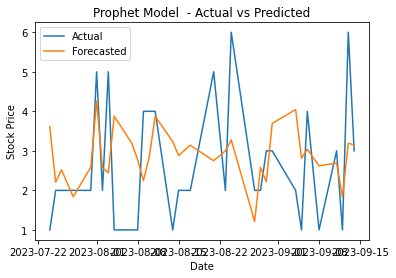

In [224]:
plt.plot(pro_test['ds'], pro_test['y'], label='Actual')
plt.plot(prophet_forecast['ds'],prophet_forecast['yhat'], label='Forecasted')
plt.title('Prophet Model  - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
--------------------------------------------------------------------------------------------------

In [410]:
df  = pd.read_excel(r'C:\Users\255046\OneDrive - NTT DATA Group\Desktop\boi_2021to2023.xlsx')

In [411]:
boi = df[['Review_Type','Min_of_Time_arrived','Risk']]

In [412]:
low = boi[boi['Risk'] == 'Low risk']

In [413]:
Corporate = low[low['Review_Type'] == 'Corporate on boarding']
cop = Corporate[['Min_of_Time_arrived','Review_Type']]
cop['Min_of_Time_arrived']=cop['Min_of_Time_arrived'].dt.date
cop['Min_of_Time_arrived']=pd.to_datetime(cop['Min_of_Time_arrived'])
cop = pd.DataFrame(cop.groupby('Min_of_Time_arrived')['Review_Type'].count()).reset_index()
cop = cop[cop['Min_of_Time_arrived'].dt.dayofweek < 5]
#cop = cop[~cop['Min_of_Time_arrived'].dt.normalize().isin(date_list)]
cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 641
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Min_of_Time_arrived  625 non-null    datetime64[ns]
 1   Review_Type          625 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 14.6 KB


C:\Users\255046\AppData\Local\Temp\ipykernel_8688\1033119855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop['Min_of_Time_arrived']=cop['Min_of_Time_arrived'].dt.date
C:\Users\255046\AppData\Local\Temp\ipykernel_8688\1033119855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop['Min_of_Time_arrived']=pd.to_datetime(cop['Min_of_Time_arrived'])


In [415]:
len(cop)*0.8

500.0

In [416]:
xg_df = pd.DataFrame()
xg_df['dayofweek'] = cop['Min_of_Time_arrived'].dt.dayofweek
xg_df['quarter'] = cop['Min_of_Time_arrived'].dt.quarter
xg_df['month'] = cop['Min_of_Time_arrived'].dt.month
xg_df['year'] = cop['Min_of_Time_arrived'].dt.year
xg_df['dayofyear'] = cop['Min_of_Time_arrived'].dt.dayofyear
xg_df['dayofmonth'] = cop['Min_of_Time_arrived'].dt.day
xg_df['weekofyear'] = cop['Min_of_Time_arrived'].dt.weekofyear

C:\Users\255046\AppData\Local\Temp\ipykernel_8688\2041692949.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  xg_df['weekofyear'] = cop['Min_of_Time_arrived'].dt.weekofyear


In [417]:
xg_df['Review_Type'] = np.log(cop['Review_Type'])

<AxesSubplot:>

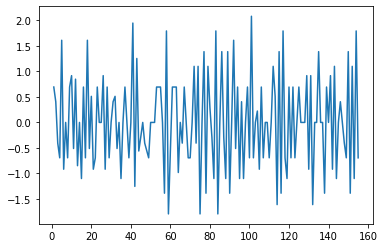

In [328]:
xg_df['Review_Type_log'] = np.log(cop['Review_Type'])
xg_df['Review_Type_log_diff'] = xg_df['Review_Type_log'] - xg_df['Review_Type_log'].shift(1)
xg_df['Review_Type_log_diff'].dropna().plot()

In [350]:
#xg_df['Review_Type'] = np.log(cop['Review_Type'])
xg_df['Review_Type_diff5'] = xg_df['Review_Type'] - xg_df['Review_Type'].shift(5)
xg_df['Review_Type_diff5'].dropna()

5      4.0
6      0.0
7     -1.0
8     -1.0
9      1.0
      ... 
151   -2.0
152    0.0
153   -1.0
154    5.0
155   -1.0
Name: Review_Type_diff5, Length: 147, dtype: float64

In [329]:
xg_df['Review_Type']= cop['Review_Type']

In [356]:
xg_df.dropna(inplace=True)

In [418]:
xg_df

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Review_Type
0,0,1,1,2021,4,4,1,1.609438
1,2,1,1,2021,6,6,1,1.386294
2,3,1,1,2021,7,7,1,0.693147
3,4,1,1,2021,8,8,1,0.693147
4,0,1,1,2021,11,11,2,1.791759
...,...,...,...,...,...,...,...,...
637,4,3,9,2023,251,8,36,0.000000
638,0,3,9,2023,254,11,37,1.098612
639,1,3,9,2023,255,12,37,0.000000
640,2,3,9,2023,256,13,37,1.791759


In [419]:
train_xgdf = xg_df[0:500]
test_xgdf = xg_df[500::]

In [420]:
x_train= train_xgdf.iloc[:,0:-1]
y_train=train_xgdf.iloc[:,-1]
x_test= test_xgdf.iloc[:,0:-1]
y_test=test_xgdf.iloc[:,-1]

In [421]:
x_test

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
513,1,1,2,2023,52,21,8
514,2,1,2,2023,53,22,8
515,3,1,2,2023,54,23,8
516,4,1,2,2023,55,24,8
517,0,1,2,2023,58,27,9
...,...,...,...,...,...,...,...
637,4,3,9,2023,251,8,36
638,0,3,9,2023,254,11,37
639,1,3,9,2023,255,12,37
640,2,3,9,2023,256,13,37


In [372]:
from xgboost import XGBRegressor
import lightgbm as lgb

In [429]:
xgb_model = lgb.LGBMRegressor(learning_rate=0.09,max_depth=-5,random_state=42)
xgb_model.fit(x_train, y_train)

LGBMRegressor(learning_rate=0.09, max_depth=-5, random_state=42)

In [425]:
xgb_model = XGBRegressor(learning_rate =0.1,n_estimators=180,colsample_bytree =0.9180733873376286, gamma=7.1578492525109585, max_depth =9, min_child_weight= 2.0, reg_alpha= 169, reg_lambda= 0.7323270024099134)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.9180733873376286, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=7.1578492525109585, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_threshold=64,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=9, max_leaves=0,
             min_child_weight=2.0, missing=nan, monotone_constraints='()',
             n_estimators=180, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, ...)

In [430]:
test_predict = xgb_model.predict(x_test)

In [431]:
print(mean_absolute_percentage_error(np.exp(test_predict),np.exp(y_test)))
print(np.sqrt(mean_squared_error(test_predict,y_test)))

0.5801072116171739
0.8145974136296711


In [376]:
train_predict = xgb_model.predict(x_train)
mean_absolute_percentage_error(train_predict,y_train)
print(np.sqrt(mean_squared_error(train_predict,y_train)))

2.3420344899279724


In [422]:
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        early_stopping_rounds=10,
       verbose=True)

[1]	training's l2: 0.515109	valid_1's l2: 0.594769
[2]	training's l2: 0.501463	valid_1's l2: 0.595533
[3]	training's l2: 0.491231	valid_1's l2: 0.594197
[4]	training's l2: 0.481837	valid_1's l2: 0.596718
[5]	training's l2: 0.473	valid_1's l2: 0.599382
[6]	training's l2: 0.464499	valid_1's l2: 0.60215
[7]	training's l2: 0.458049	valid_1's l2: 0.606401
[8]	training's l2: 0.451576	valid_1's l2: 0.611586
[9]	training's l2: 0.44691	valid_1's l2: 0.612499
[10]	training's l2: 0.441963	valid_1's l2: 0.618315
[11]	training's l2: 0.43526	valid_1's l2: 0.618507
[12]	training's l2: 0.429775	valid_1's l2: 0.625435
[13]	training's l2: 0.423755	valid_1's l2: 0.624423


C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMRegressor()

In [423]:
test_predict1

array([0.84310244, 0.81010299, 0.81010299, 0.81010299, 0.81010299,
       0.81010299, 0.85542362, 0.85542362, 0.81037499, 0.81037499,
       0.81037499, 0.80276256, 0.80276256, 0.80276256, 0.80276256,
       0.84310244, 0.84310244, 0.84310244, 0.84310244, 0.81010299,
       0.81010299, 0.81010299, 0.81010299, 0.81010299, 0.85542362,
       0.85542362, 0.85542362, 0.81037499, 0.81037499, 0.81037499,
       0.80276256, 0.80276256, 0.80276256, 0.80276256, 0.84310244,
       0.84310244, 0.84310244, 0.81010299, 0.81010299, 0.81010299,
       0.81010299, 0.85542362])

In [424]:
test_predict1 = lgb_model.predict(x_test)
print(mean_absolute_percentage_error(np.exp(test_predict1),np.exp(y_test)))
print(np.sqrt(mean_squared_error(test_predict1,y_test)))

0.5363067555101746
0.7708417128032462


In [389]:
test_predict1

array([1.13291767, 2.11828573, 1.13291767, 2.11828573, 1.12548047,
       1.12548047, 2.11084853, 2.11084853, 2.11084853, 2.11084853,
       5.01849731, 2.16708495, 5.1303555 , 1.16005258, 1.16005258,
       1.16005258, 5.1303555 , 4.42974136, 4.42974136, 1.13291767,
       2.11828573, 2.11828573, 5.01849731, 2.13251284, 5.1303555 ,
       2.13251284, 2.11084853, 2.8752417 , 2.8752417 , 2.16708495,
       1.16005258, 5.1303555 , 1.16005258, 3.47143485, 1.13291767,
       5.1303555 , 2.90434321])

In [390]:
y_test

119    1
120    2
121    1
122    2
123    1
124    1
125    2
126    2
127    2
128    2
129    5
130    2
131    5
132    1
133    1
134    1
135    4
136    4
137    4
138    1
139    2
140    2
141    5
142    2
143    6
144    2
145    2
146    3
147    3
148    2
149    1
150    4
151    1
152    3
153    1
154    6
155    3
Name: Review_Type, dtype: int64

In [391]:
train_predict1 = xgb_model1.predict(x_train)
print(mean_absolute_percentage_error(train_predict1,y_train))
print(np.sqrt(mean_squared_error(train_predict1,y_train)))

0.11150208271792741
0.6348444751240192


In [564]:
from sklearn.metrics import accuracy_score
import xgboost as xgb

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [565]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [575]:
def objective(space):
    clf=xgb.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [576]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
SCORE:                                                                                                      

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.2682926829268293                                                                                                     
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

SCORE:                                                                                                                 
0.2682926829268293                                                                                                     
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
SCORE:                                                                                                                 
0.2682926829268293                                                                                                     
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
SCORE:                                                                                                                 
0.2682926829268293                                                                                                     
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecat

[23:14:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[23:14:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/

In [577]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9180733873376286, 'gamma': 7.1578492525109585, 'max_depth': 9.0, 'min_child_weight': 2.0, 'reg_alpha': 169.0, 'reg_lambda': 0.7323270024099134}


In [622]:

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster